In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

c:\users\bigdata\documents\python scripts\udemy-python-4-finance\pyfin\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6412 entries, 1995-01-03 to 2020-06-19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6412 non-null   float64
 1   MSFT    6412 non-null   float64
 2   F       6412 non-null   float64
 3   GE      6412 non-null   float64
dtypes: float64(4)
memory usage: 250.5 KB


In [4]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,6.320252,2.406834,3.262354,2.729230
1995-01-04,6.269589,2.424330,3.350130,2.729230
1995-01-05,6.180927,2.384342,3.320871,2.735919
1995-01-06,6.193593,2.424330,3.320871,2.722540
1995-01-09,6.168259,2.409335,3.379390,2.695783


In [5]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2020-06-15,116.690002,188.940002,6.50,7.24
2020-06-16,118.129997,193.570007,6.55,7.47
2020-06-17,117.930000,194.240005,6.33,7.24
2020-06-18,119.279999,196.320007,6.33,7.28
2020-06-19,118.919998,195.149994,6.23,7.15


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

In [6]:
mydata.iloc[0]

PG      6.320252
MSFT    2.406834
F       3.262354
GE      2.729230
Name: 1995-01-03 00:00:00, dtype: float64

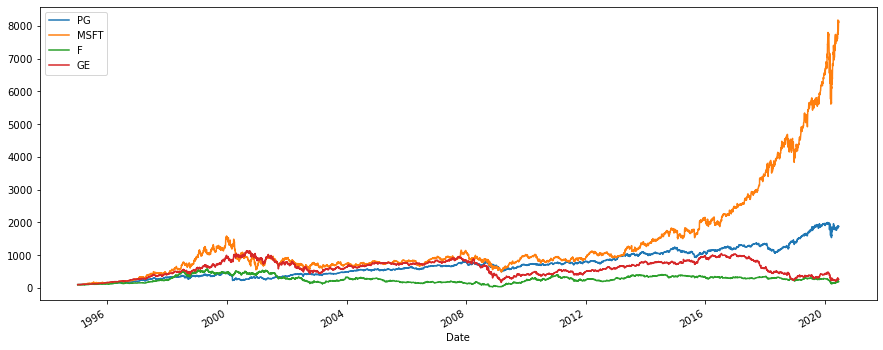

In [7]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6))
plt.show()

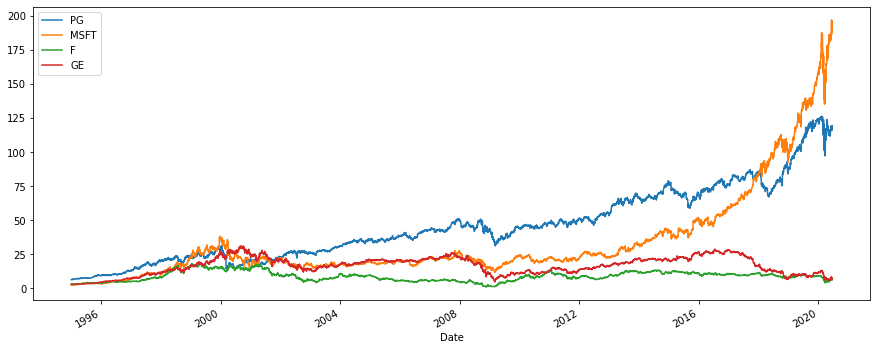

In [8]:
mydata.plot(figsize=(15,6))
plt.show()

In [9]:
mydata.loc['1995-01-03']

PG      6.320252
MSFT    2.406834
F       3.262354
GE      2.729230
Name: 1995-01-03 00:00:00, dtype: float64

In [10]:
mydata.iloc[0]

PG      6.320252
MSFT    2.406834
F       3.262354
GE      2.729230
Name: 1995-01-03 00:00:00, dtype: float64

## Calculating the Return of a Portfolio of Securities

In [12]:
#returns = (mydata / mydata.shift(1)) - 1
returns = mydata.pct_change()
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017622,-0.009828


In [14]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [18]:
#np.dot(returns, weights)
returns.dot(weights)

Date
1995-01-03         NaN
1995-01-04    0.006540
1995-01-05   -0.009230
1995-01-06    0.003483
1995-01-09   -0.000621
                ...   
2020-06-15    0.005115
2020-06-16    0.019076
2020-06-17   -0.015652
2020-06-18    0.006920
2020-06-19   -0.010658
Length: 6412, dtype: float64

***

In [19]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.140414
MSFT    0.221502
F       0.105312
GE      0.088126
dtype: float64

In [20]:
#np.dot(annual_returns, weights)
annual_returns.dot(weights)

0.13883842891812698

In [27]:
#pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
pfolio_1 = str(round(annual_returns.dot(weights), 4) * 100) + ' %'
print(pfolio_1)

13.88 %


***

In [28]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [31]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 4) * 100) + ' %'
print (pfolio_1)
print (pfolio_2)

13.88 %
16.5 %
